In [86]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

%matplotlib inline

In [39]:
df = pd.read_csv('labels.csv')
trash = ['48066618.jpg','53612950.jpg','70499243.jpg','75838740.jpg','78966981.jpg','81261299.jpg',
    '81783998.jpg','83418661.jpg','83765533.jpg','image_2864.jpg','45625098.jpg',
    '49574321.jpg','66953166.jpg','74451064.jpg','75725733.jpg','996439.jpg','1145376.jpg']
# len(trash)
df = df[~df['file_name'].isin(trash)]
bbox = [box[1:-1].split(',') for box in df['bbox']]
x1 = [int(float(box[0])) for box in bbox]
y1 = [int(float(box[1])) for box in bbox]
x2 = [int(float(box[0])+float(box[2])) for box in bbox]
y2 = [int(float(box[1])+float(box[3])) for box in bbox]
df['x1'] = x1
df['y1'] = y1
df['x2'] = x2
df['y2'] = y2
df = df.drop(['bbox'], axis=1)
df


,file_name,height,width,age,race,masked,skintone,emotion,gender,x1,y1,x2,y2
0,100013282.jpg,1333,2000,20-30s,Caucasian,unmasked,mid-light,Neutral,Male,934,144,1172,474
1,100016175.jpg,1333,2000,20-30s,Caucasian,unmasked,light,Neutral,Male,1094,422,1149,494
2,10004189.jpg,2000,1333,20-30s,Mongoloid,unmasked,light,Happiness,Female,419,269,797,760
3,100104575.jpg,1333,2000,20-30s,Caucasian,unmasked,mid-light,Neutral,Male,1490,676,1528,746
4,100104600.jpg,2000,1333,20-30s,Caucasian,unmasked,mid-light,Happiness,Female,549,92,856,529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15305,image_2713.jpg,1024,1024,40-50s,Caucasian,unmasked,mid-light,Happiness,Male,244,176,831,1004
15306,image_3332.jpg,1024,1024,Senior,Caucasian,unmasked,light,Happiness,Female,265,174,850,971
15307,image_6905.jpg,1024,1024,20-30s,Caucasian,unmasked,light,Neutral,Male,251,184,751,983
15308,image_4080.jpg,1024,1024,Kid,Caucasian,unmasked,light,Happiness,Female,222,179,809,894


In [40]:
len(df['file_name'].unique()), len(df)

(14983, 15292)

In [32]:
df['gender'].value_counts()

gender
Female    10510
Male       4782
Name: count, dtype: int64

In [48]:
lst = df.values.tolist()
random.shuffle(lst)
val_ratio = 0.2
val_lst = lst[:int(0.2*len(lst))]
train_lst = lst[int(0.2*len(lst)):]
len(val_lst), len(train_lst), len(lst)

(3058, 12234, 15292)

In [52]:
age_train = 'cropped_face/age/train/'
age_val = 'cropped_face/age/valid/'
emotion_train = 'cropped_face/emotion/train/'
emotion_val = 'cropped_face/emotion/valid/'
gender_train = 'cropped_face/gender/train/'
gender_val = 'cropped_face/gender/valid/'
masked_train = 'cropped_face/masked/train/'
masked_val = 'cropped_face/masked/valid/'
race_train = 'cropped_face/race/train/'
race_val = 'cropped_face/race/valid/'
skintone_train = 'cropped_face/skintone/train/'
skintone_val = 'cropped_face/skintone/valid/'
IMG_DIR = 'all_images/'
len(os.listdir(IMG_DIR))

14983

(1333, 2000, 3)

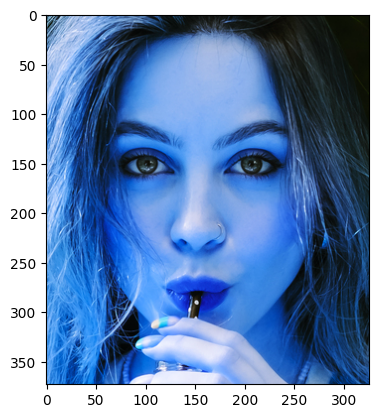

In [79]:
img = train_lst[8]
file_name, height, width, age, race, masked, skintone, emotion,	gender, x1,	y1,	x2, y2 = img
file_name, height, width, age, race, masked, skintone, emotion,	gender, x1,	y1,	x2, y2
i = cv2.imread(IMG_DIR+file_name)
# i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
# i = cv2.rectangle(i, (x1, y1), (x2, y2), (255, 0, 0), 3)
face = i[int(0.95*y1):min(height, int(1.05*y2)), int(0.95*x1):min(width, int(x2*1.05)), :]
cv2.imwrite('draft2.jpg', face)
plt.imshow(face)
# plt.imshow(i)
i.shape

In [88]:
count = 1
for img in tqdm(val_lst):
    file_name, height, width, age, race, masked, skintone, emotion,	gender, x1,	y1,	x2, y2 = img
    i = cv2.imread(IMG_DIR+file_name)
    face = i[int(0.95*y1):min(height-1, int(1.05*y2)), int(0.95*x1):min(width-1, int(x2*1.05)), :]
    cv2.imwrite(f'{age_val}{age.lower()}/px{count}.jpg', face)
    cv2.imwrite(f'{emotion_val}{emotion.lower()}/px{count}.jpg', face)
    cv2.imwrite(f'{gender_val}{gender.lower()}/px{count}.jpg', face)
    cv2.imwrite(f'{masked_val}{masked.lower()}/px{count}.jpg', face)
    cv2.imwrite(f'{race_val}{race.lower()}/px{count}.jpg', face)
    cv2.imwrite(f'{skintone_val}{skintone.lower()}/px{count}.jpg', face)
    count += 1
print(count)

100%|████████████████████████████████████████████████████| 3058/3058 [02:57<00:00, 17.27it/s]

3059


In [89]:
count = 1
for img in tqdm(train_lst):
    file_name, height, width, age, race, masked, skintone, emotion,	gender, x1,	y1,	x2, y2 = img
    i = cv2.imread(IMG_DIR+file_name)
    face = i[int(0.95*y1):min(height-1, int(1.05*y2)), int(0.95*x1):min(width-1, int(x2*1.05)), :]
    cv2.imwrite(f'{age_train}{age.lower()}/px{count}.jpg', face)
    cv2.imwrite(f'{emotion_train}{emotion.lower()}/px{count}.jpg', face)
    cv2.imwrite(f'{gender_train}{gender.lower()}/px{count}.jpg', face)
    cv2.imwrite(f'{masked_train}{masked.lower()}/px{count}.jpg', face)
    cv2.imwrite(f'{race_train}{race.lower()}/px{count}.jpg', face)
    cv2.imwrite(f'{skintone_train}{skintone.lower()}/px{count}.jpg', face)
    count += 1
print(count)

100%|██████████████████████████████████████████████████| 12234/12234 [11:54<00:00, 17.12it/s]

12235


In [87]:
skintone = 'Light'
count = 100
f'{skintone_train}{skintone.lower()}/px{count}.jpg'

'cropped_face/skintone/train/light/px100.jpg'

In [ ]:
len(os.lisdir())